In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

In [2]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Target variable : Profit

### Overview of the data

In [3]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Checking if there are duplicate and null values

In [5]:
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
new_df = df.copy()

In [9]:
new_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Visualization

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

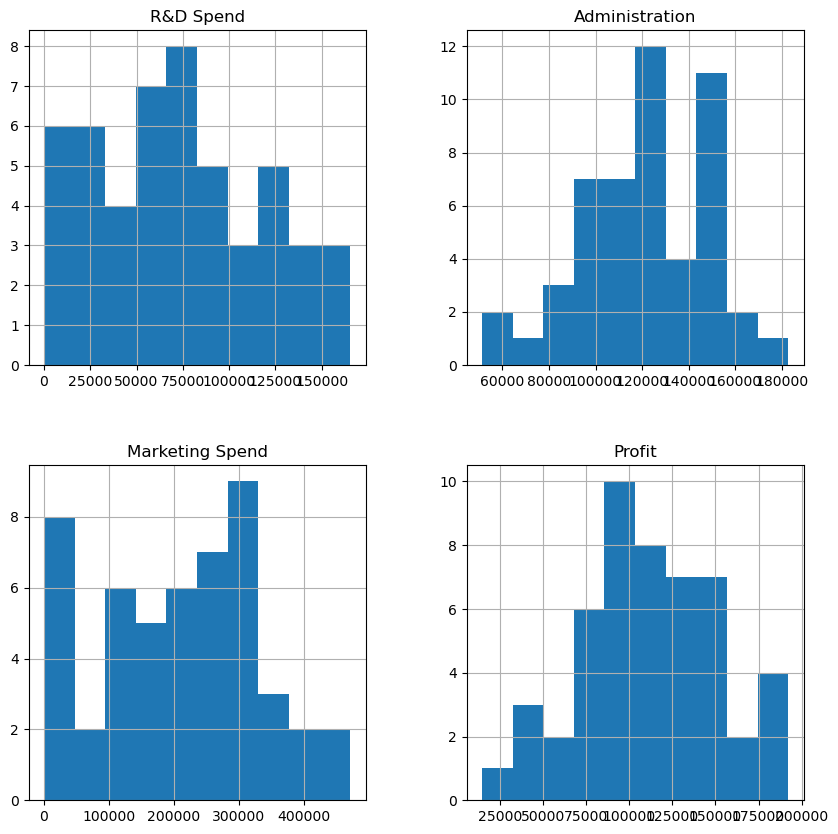

In [10]:
df.hist(bins=10,figsize=(10,10))
    


<AxesSubplot:xlabel='Profit', ylabel='Density'>

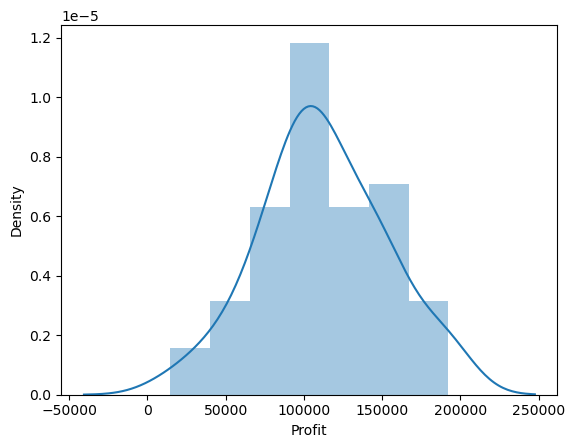

In [11]:
sns.distplot(df['Profit'])

### To check whether linear regression can be applied my target variable should have a linear relationship to its independent variables. So we'll use pairplot to check that

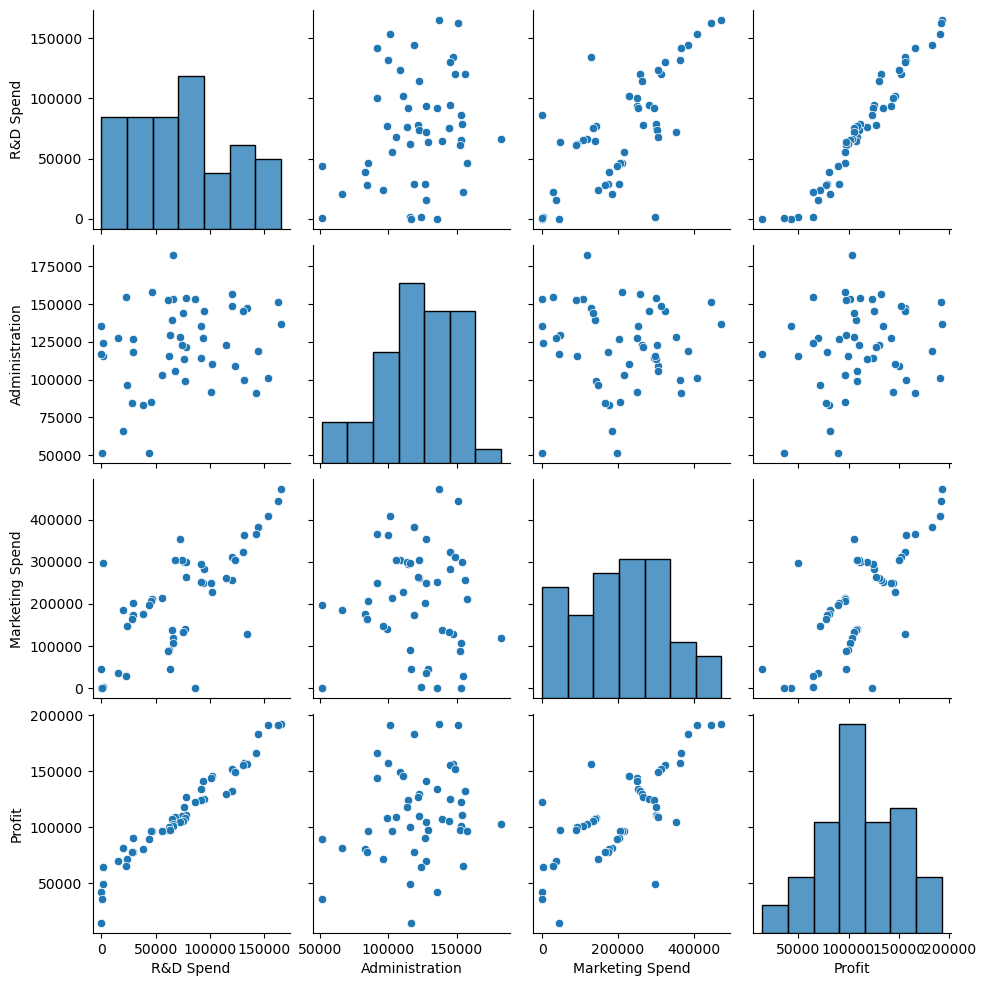

In [12]:
sns.pairplot(new_df)

### To check whether outliers are present let's use boxplot

<AxesSubplot:xlabel='R&D Spend'>

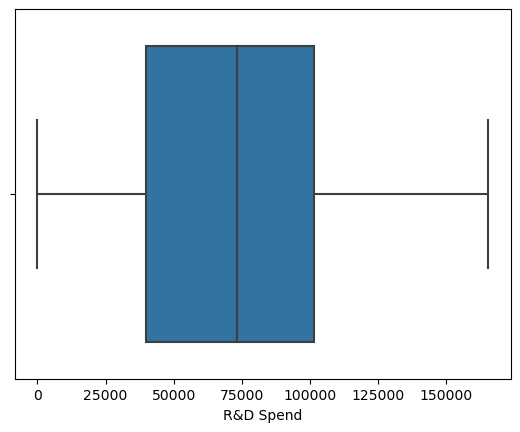

In [13]:
sns.boxplot(df['R&D Spend'])

<AxesSubplot:xlabel='Administration'>

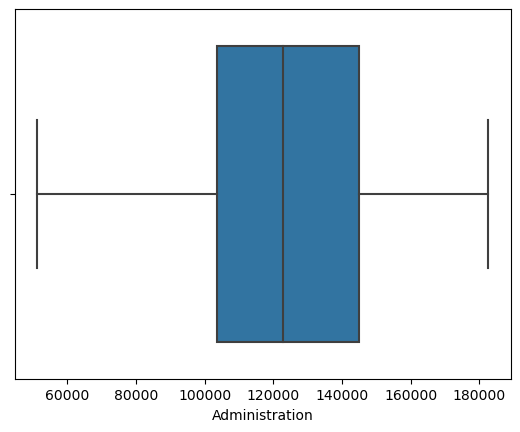

In [14]:
sns.boxplot(df['Administration'])

<AxesSubplot:xlabel='Marketing Spend'>

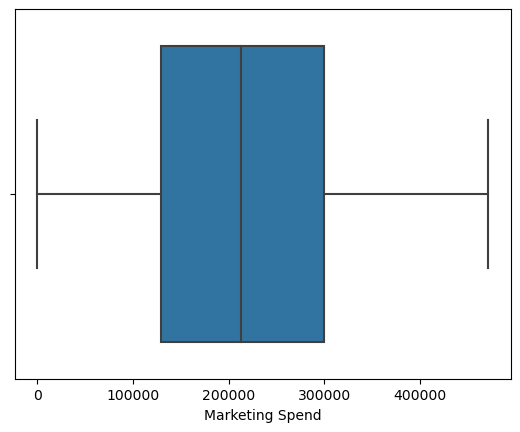

In [15]:
sns.boxplot(df['Marketing Spend'])

<AxesSubplot:xlabel='State', ylabel='count'>

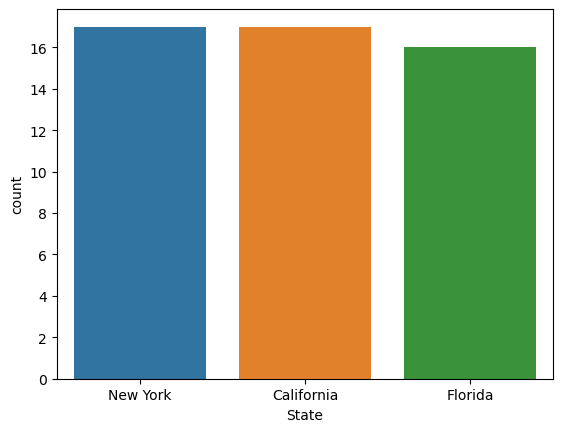

In [16]:
sns.countplot(df['State'])

### Feature Engineering
Converting Categorical variable to Numerical Variable

In [17]:
new_df = pd.get_dummies(df,drop_first=True)

In [18]:
new_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [19]:
new_df.shape

(50, 6)

In [20]:
round(50*0.7,0)

35.0

### Now let's split the data into train and test

In [26]:
ols_train = new_df.iloc[0:35,]
ols_test = new_df.iloc[35:51,]

In [23]:
ols_train.shape

(35, 6)

In [24]:
ols_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


Renaming column names to replace the whitespaces

In [24]:
new_df.rename(columns={'R&D Spend': 'RnD_Spend','Marketing Spend':'Marketing_Spend','State_New York':'State_New_York'}, inplace=True)

## Building OLS Model

In [27]:
model_1 = smf.ols(formula="Profit ~ RnD_Spend + Administration + Marketing_Spend + State_Florida+State_New_York", data = ols_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 24 May 2023   Prob (F-statistic):           8.17e-18
Time:                        17:03:07   Log-Likelihood:                -357.26
No. Observations:                  35   AIC:                             726.5
Df Residuals:                      29   BIC:                             735.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.71e+04   9392.532     

### Observation

The P-value of State[T.Florida],State[T.New York], Administration and Marketing_Spend are greater than significance value of 0.05. Hence we have to drop all

In [31]:
model2 = smf.ols(formula='Profit~RnD_Spend',data=ols_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     480.1
Date:                Wed, 24 May 2023   Prob (F-statistic):           3.09e-21
Time:                        17:04:56   Log-Likelihood:                -361.29
No. Observations:                  35   AIC:                             726.6
Df Residuals:                      33   BIC:                             729.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.808e+04   4003.007     12.011      0.0

In [32]:
new_ols_test1=ols_test.copy()

In [33]:
new_ols_test1.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_Florida', 'State_New_York'],
      dtype='object')

In [34]:
X_test = new_ols_test1.loc[:,['Profit','RnD_Spend']]

In [35]:
model2_prediction = model2.predict(X_test)

In [36]:
model2_prediction.head()

35    87587.830182
36    72691.550366
37    85918.724895
38    65450.289639
39    81186.810075
dtype: float64

Calculating rmse value

In [37]:
rmse_value = rmse(X_test['Profit'],model2_prediction)

In [38]:
rmse_value

12604.088941559563

In [39]:
final_Result = pd.DataFrame({'Actual':X_test['Profit'],'Predicted':model2_prediction,'Residuals':X_test['Profit']-model2_prediction})
final_Result.head()

,Actual,Predicted,Residuals
35,96479.51,87587.830182,8891.679818
36,90708.19,72691.550366,18016.639634
37,89949.14,85918.724895,4030.415105
38,81229.06,65450.289639,15778.770361
39,81005.76,81186.810075,-181.050075


In [40]:
192261+rmse_value

204865.08894155957

In [41]:
192261 - rmse_value

179656.91105844043

So while explaining to stakeholders I'll tell that my predicted profit can be +/-12604 of the predicted value.